# Linear Regression Bike Sharing Assignment

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Reading the Data

In [2]:
bike = pd.read_csv('day.csv')

### Inspecting the DataFrame

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the number or rows and columns in the dataset
bike.shape

(730, 16)

In [5]:
# Listing the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# First hand look at the count of null values in data if any and the dtypes of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the summary of the numerical variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking the null values in the dataset
null_percentage = ((bike.isnull().sum()/len(bike))*100).sort_values(ascending=False)
null_percentage

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

- There are no null values in the dataset, hence we do not eliminate any of the columns


## Data Preparation

### Removing unwanted and redundant columns

In [9]:
# Listing the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

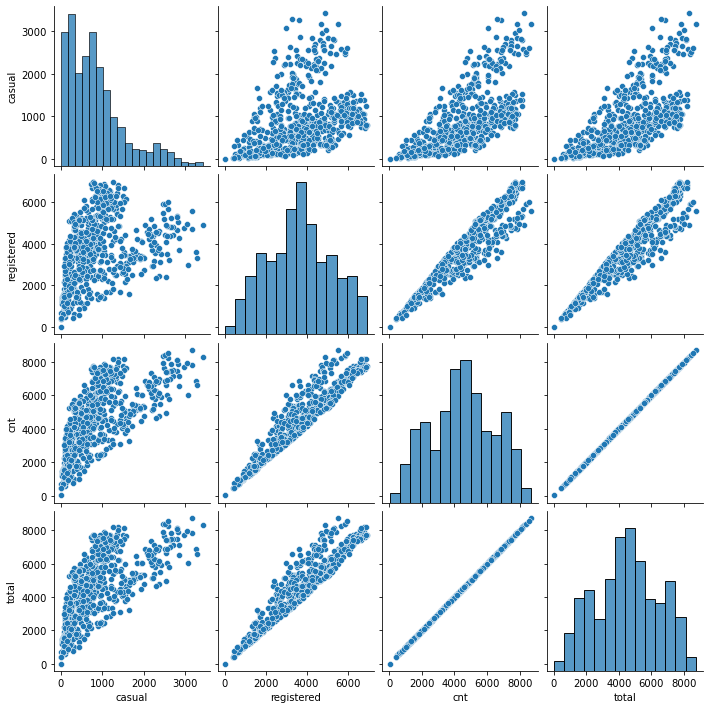

In [10]:
# Checking the relationship between causla, registered and cnt column
bike_count = bike[['casual','registered','cnt']]
# Creating a column for casual + registered users, to check if cnt is actually the total of these two.
bike_count['total'] = bike_count['casual'] + bike_count['registered']
# pairplot to see the relationship between these variables
sns.pairplot(bike_count)
plt.show

#### From above pairplots it is confirmed that cnt which is our target variable is in fact the total of casual and registered users

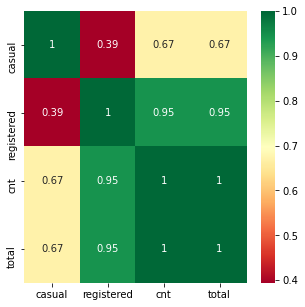

In [11]:
# Confirming the correlation by plotting the heat map
plt.figure(figsize = (5,5))
sns.heatmap(bike_count.corr(), annot = True, cmap= 'RdYlGn')
plt.show()

Analysing the data and the data dictionary, following columns can be removed from further analysis:

- instant : It is an index value and it has no use afterwards, hence can be dropped.
- dteday : This is Date, and since we already have the 'month' and 'year' columns , we can remove this column.
- casual and registered : These two columns contains the coun of bikes booked by different categories of customers i.e, casual & registered. Since our objective is to find the total count of bikes , we can remove the two columns

We can see from above plotted pairplot and heatmap that cnt is actually the total of casual and registered.


In [12]:
# Dropping the above mentioned columns.
bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
bike.shape

(730, 12)

In [13]:
# Checking if the columns have been removed
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Converting the Season, weather, month and weekday to Categorical type 

As we can see from the data season, weathersit, yr, month, holiday, weekday, workingday all are categorical variables.
But they are given as numbers. So we will encode them with appropriate/specified values


- season: converting season values as mentioned in data dictionary 1:Spring, 2:Summer, 3:Fall, 4:Winter.
- weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Lightrain_thunderstrom, 4:Heavyrain_thunderstrom
- mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec.
- weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat.

#### Season

In [14]:
bike['season'].replace({1:"spring", 2:"summer", 3:"Fall", 4:'Winter'}, inplace=True)
bike['season'].value_counts(normalize=True)

Fall      0.257534
summer    0.252055
spring    0.246575
Winter    0.243836
Name: season, dtype: float64

#### Weathersit

In [15]:
bike['weathersit'].replace({1:"Clear",2:"Misty",3:"Lightrain_thunderstrom",4:"Heavyrain_thunderstrom"}, inplace=True)
bike['weathersit'].value_counts(normalize=True)

Clear                     0.634247
Misty                     0.336986
Lightrain_thunderstrom    0.028767
Name: weathersit, dtype: float64

#### mnth

In [16]:
bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bike['mnth'].value_counts(normalize=True)

Jul    0.084932
May    0.084932
Mar    0.084932
Oct    0.084932
Dec    0.084932
Aug    0.084932
Jan    0.084932
Sep    0.082192
Jun    0.082192
Nov    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

#### Weekday

In [17]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike['weekday'].value_counts(normalize=True)

Monday       0.143836
Sunday       0.143836
Saturday     0.143836
Friday       0.142466
Tuesday      0.142466
Thursday     0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

In [18]:
# Now checking the dtypes of the encodec columns, we can see that they are now converted to object
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [19]:
# Doing the value_count foe every column to check the junk values present if any.
for col in bike:
    print(bike[col].value_counts(), '\n')

Fall      188
summer    184
spring    180
Winter    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

Jul    62
May    62
Mar    62
Oct    62
Dec    62
Aug    62
Jan    62
Sep    60
Jun    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

Monday       105
Sunday       105
Saturday     105
Friday       104
Tuesday      104
Thursday     104
Wednesday    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

Clear                     463
Misty                     246
Lightrain_thunderstrom     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
29.144153    4
27.880000    4
23.130847    4
            ..
10.909567    1
17.459153    1
12.265847    1
27.230847    1
17.425000    1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
29.76730    2
28.72500    2
           ..
28.72625    1
19.50730    1
27.52665    1
21.33685    1
15.40375 

As seen above we found no junk values present in the dataset

### EDA

#### Visualizing categorical variables

In [20]:
# Listing the columns to do the selection for plotting
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='yr', ylabel='cnt'>

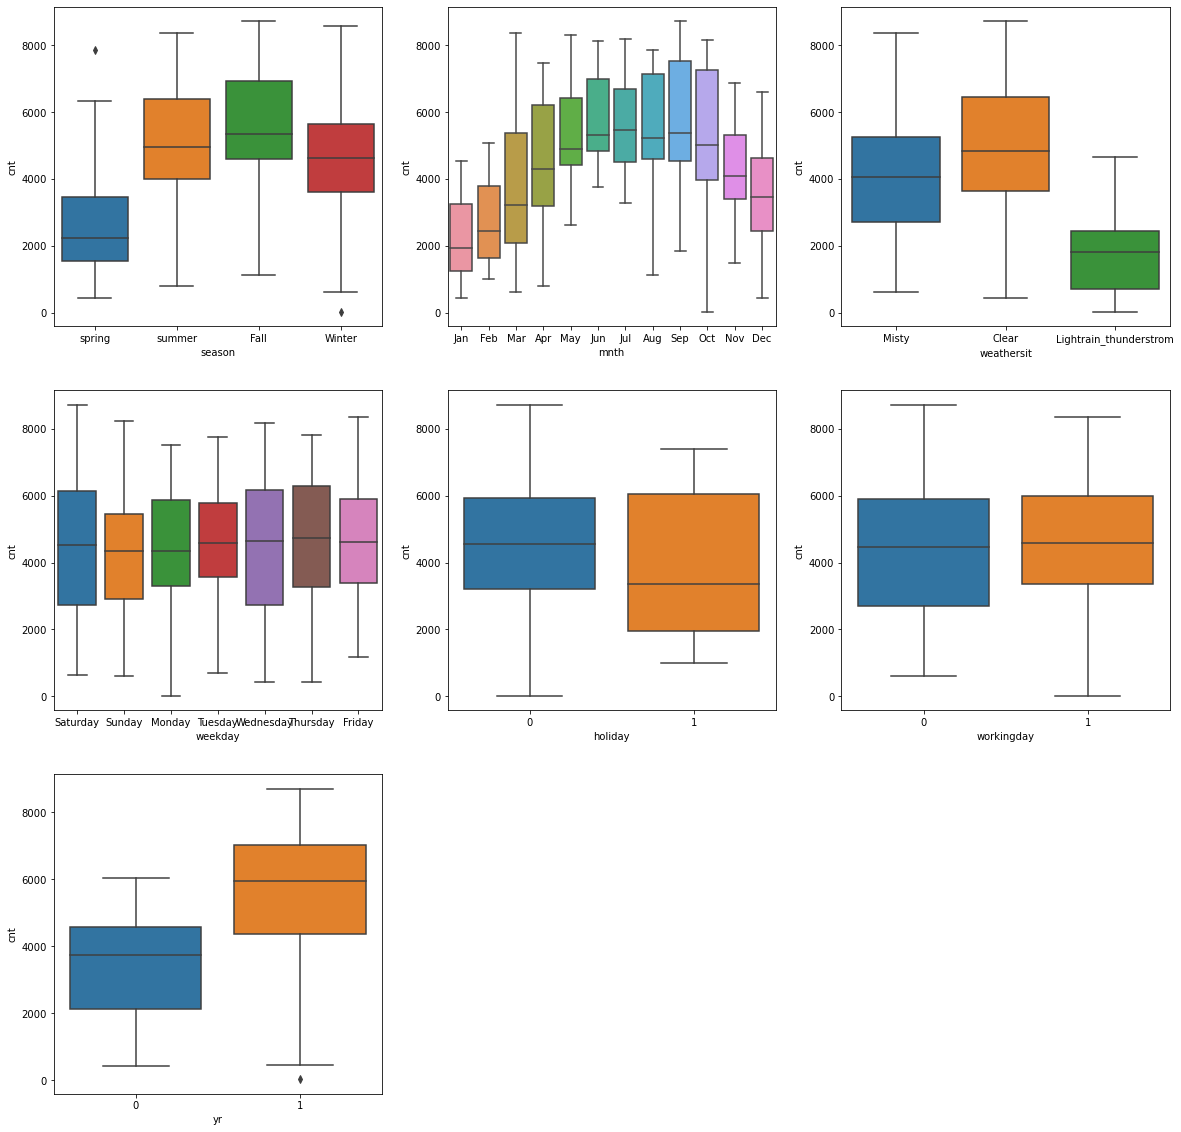

In [21]:
#Boxplot for gaining insights from these columns
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y ='cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y ='cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x= 'weathersit', y='cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x='weekday', y='cnt',data =bike)
plt.subplot(3,3,5)
sns.boxplot(x= 'holiday', y='cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt',data =bike)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data = bike)

#### Insights

1. Fall(Autumn) season has the highest demand for rental bikes, it could be due to the fact that fall is considered to be as transition from summer to winter during which temperature is niether too high nor too low. The weather is pleasant. So bike rentals are more in this season.We can say that weathersit can be a good predictor for the dependent variable.
2. THe demand for rental bikes has decreased on Holidays, more bike rentals on non-holiday
3. Bike rental demand has gone up from 2018 to 2019.
4. The rentals on weekdays i.e. days of the week are almost same. We can't see any obvious trend. It can effect or not effect the dependent variable. We will se later at the model building stages.
5. When the weather is clear, the demand for the bike is highest which is obvious. In bad weather the demand is lowest. Weather sit can be a good predictor for the dependent variable.
6. Demand is continuously growing till June. September month has the highest demand for the bikes. After September, demand is decreasing.
7. Bike sharing is more during september. It is less at begginning and at the end of the year.It could be due to cold/extereme weather conditions. So we can say that month is a good predictor of dependent variable.

#### VIsualizing Numerical Variables

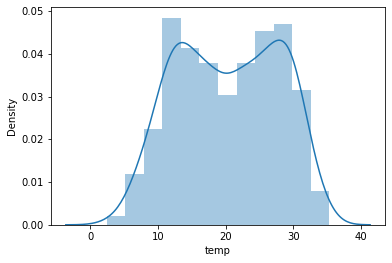

In [22]:
#Distplot for temperature
sns.distplot(bike["temp"])
plt.show()

Generally bike rentals increase as temperature increases, but we see a declne at higher temperatures of more than 35-40

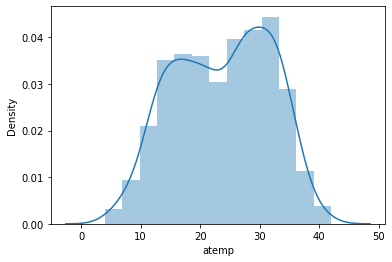

In [23]:
#Distplot for feel temp
sns.distplot(bike["atemp"])
plt.show()

- Trend almost similar to temp

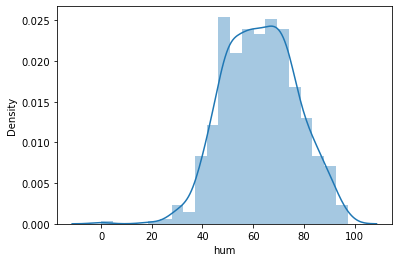

In [24]:
# Distplot for humidity
sns.distplot(bike["hum"])
plt.show()

- Bike rentals increases upto a certain level of humidity after that it decreses with increase in humidity.

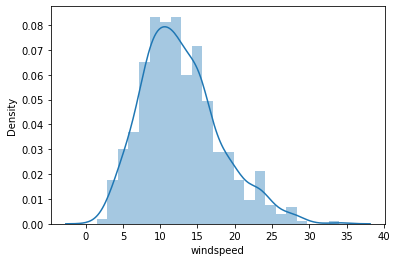

In [25]:
# Distplot for Windspeed
sns.distplot(bike["windspeed"])
plt.show()

- Bike rentals increases upto a certain windspeed after that it decreses with increase in windspeed.

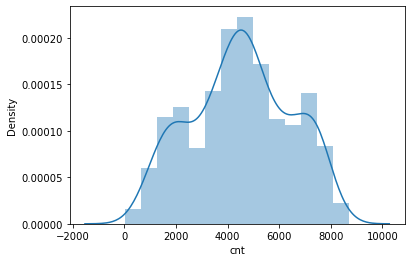

In [26]:
# Distplot for target variable
sns.distplot(bike["cnt"])
plt.show()

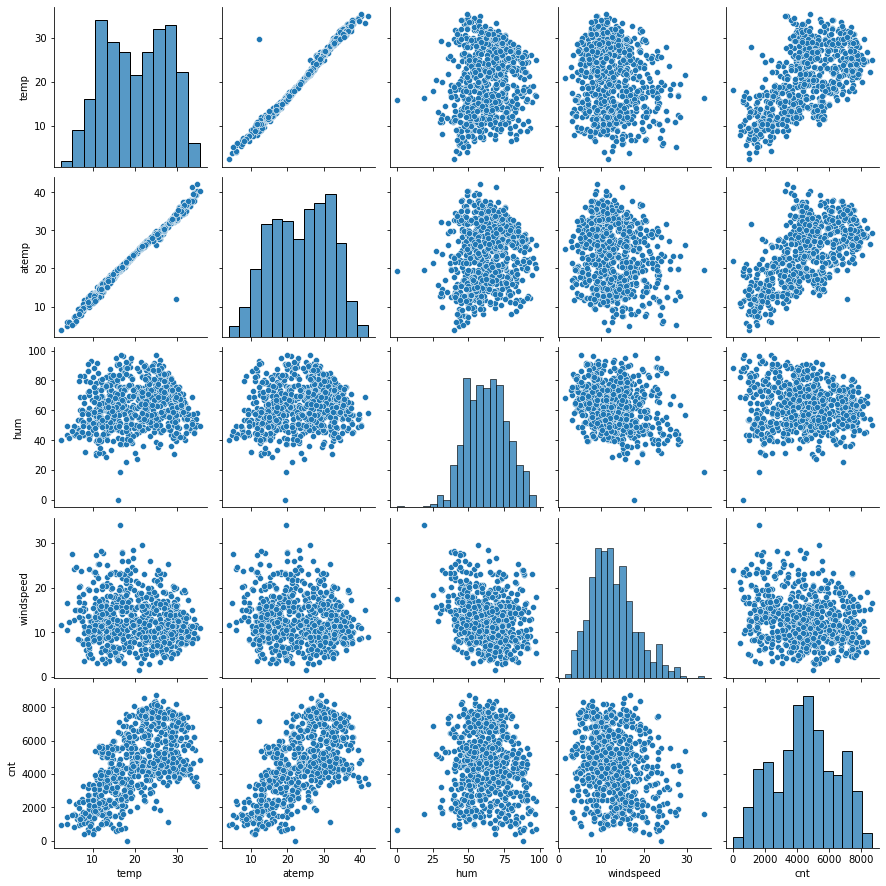

In [27]:
# Pair plots for numerical variables
vars = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike[vars])
plt.show()

##### Insight 
1. We can see from the pairplots that there is a linear relationship between temp, atemp and cnt.
2. There is a positive correlation between temperature & demand for bikes. Demand is linearly increasing with increase in temp.
3. Humidity Values are like highly scattered. But we can see that demand is decreasing with increase in humidity.
4. Like humidity, windspeed values are also scattered but we can see that cnt/demand is decreasing with increase in windspeed.

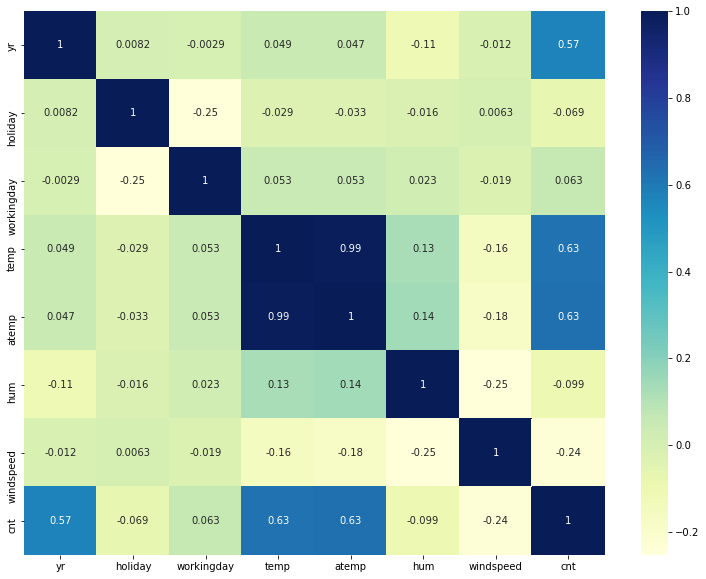

In [28]:
# Correlation heatmap for numerical variables.
plt.figure(figsize = (13, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insight
We can see that temp and atemp has a correlation of 0.99 which is very high.We also know from data dictionary that temp & atemp are closely related. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value with respect to other variables. Or During RFE may be it will be left out automatically. So we will sort this out at later stages during model building.

### Dummy Variable creation


In [29]:
# Gettign the dummy variables for the features 'season', 'weathersit', 'mnth' and 'weekday' and store them in a new variable -'bike_dummies'
bike_dummies = pd.get_dummies(bike[['season','weathersit','mnth','weekday']], drop_first=True)
bike_dummies.head()

,season_Winter,season_spring,season_summer,weathersit_Lightrain_thunderstrom,weathersit_Misty,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# merging our dummy variable dataset into the original dataset and calling it bike_new
bike_new = pd.concat([bike,bike_dummies],axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Dropping columns whose dummies have been created to prevent crowding and redundancy
bike_new.drop(['season','weathersit','mnth','weekday'],axis=1,inplace=True)
bike_new.shape


(730, 30)

In [32]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   yr                                 730 non-null    int64  
 1   holiday                            730 non-null    int64  
 2   workingday                         730 non-null    int64  
 3   temp                               730 non-null    float64
 4   atemp                              730 non-null    float64
 5   hum                                730 non-null    float64
 6   windspeed                          730 non-null    float64
 7   cnt                                730 non-null    int64  
 8   season_Winter                      730 non-null    uint8  
 9   season_spring                      730 non-null    uint8  
 10  season_summer                      730 non-null    uint8  
 11  weathersit_Lightrain_thunderstrom  730 non-null    uint8  

In [33]:
# CHecking the new dataframe with dummy variables
bike_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Winter,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,...,0,0,0,0,0,0,0,1,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,1,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,1,0,0,0


### Splitting the Data into Training and Testing Sets

In [34]:
# Splittig the data into 70-30% ratio into Train and Test data respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size=0.7, random_state =100)

In [35]:
# Confirming the shape of train dataset after splitting
bike_train.shape

(510, 30)

In [36]:
# Confirming the shape of test dataset after splitting
bike_test.shape

(220, 30)

### Rescaling

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

In [37]:
# Using Min Max scaling
scaler = MinMaxScaler()

In [38]:
#Dataset before scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Winter,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Apply scaler() to all numerical columns
num_vars = ['temp','atemp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [40]:
# dataset after scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Winter,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Winter,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.243137,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.429398,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Correlation Coefficients

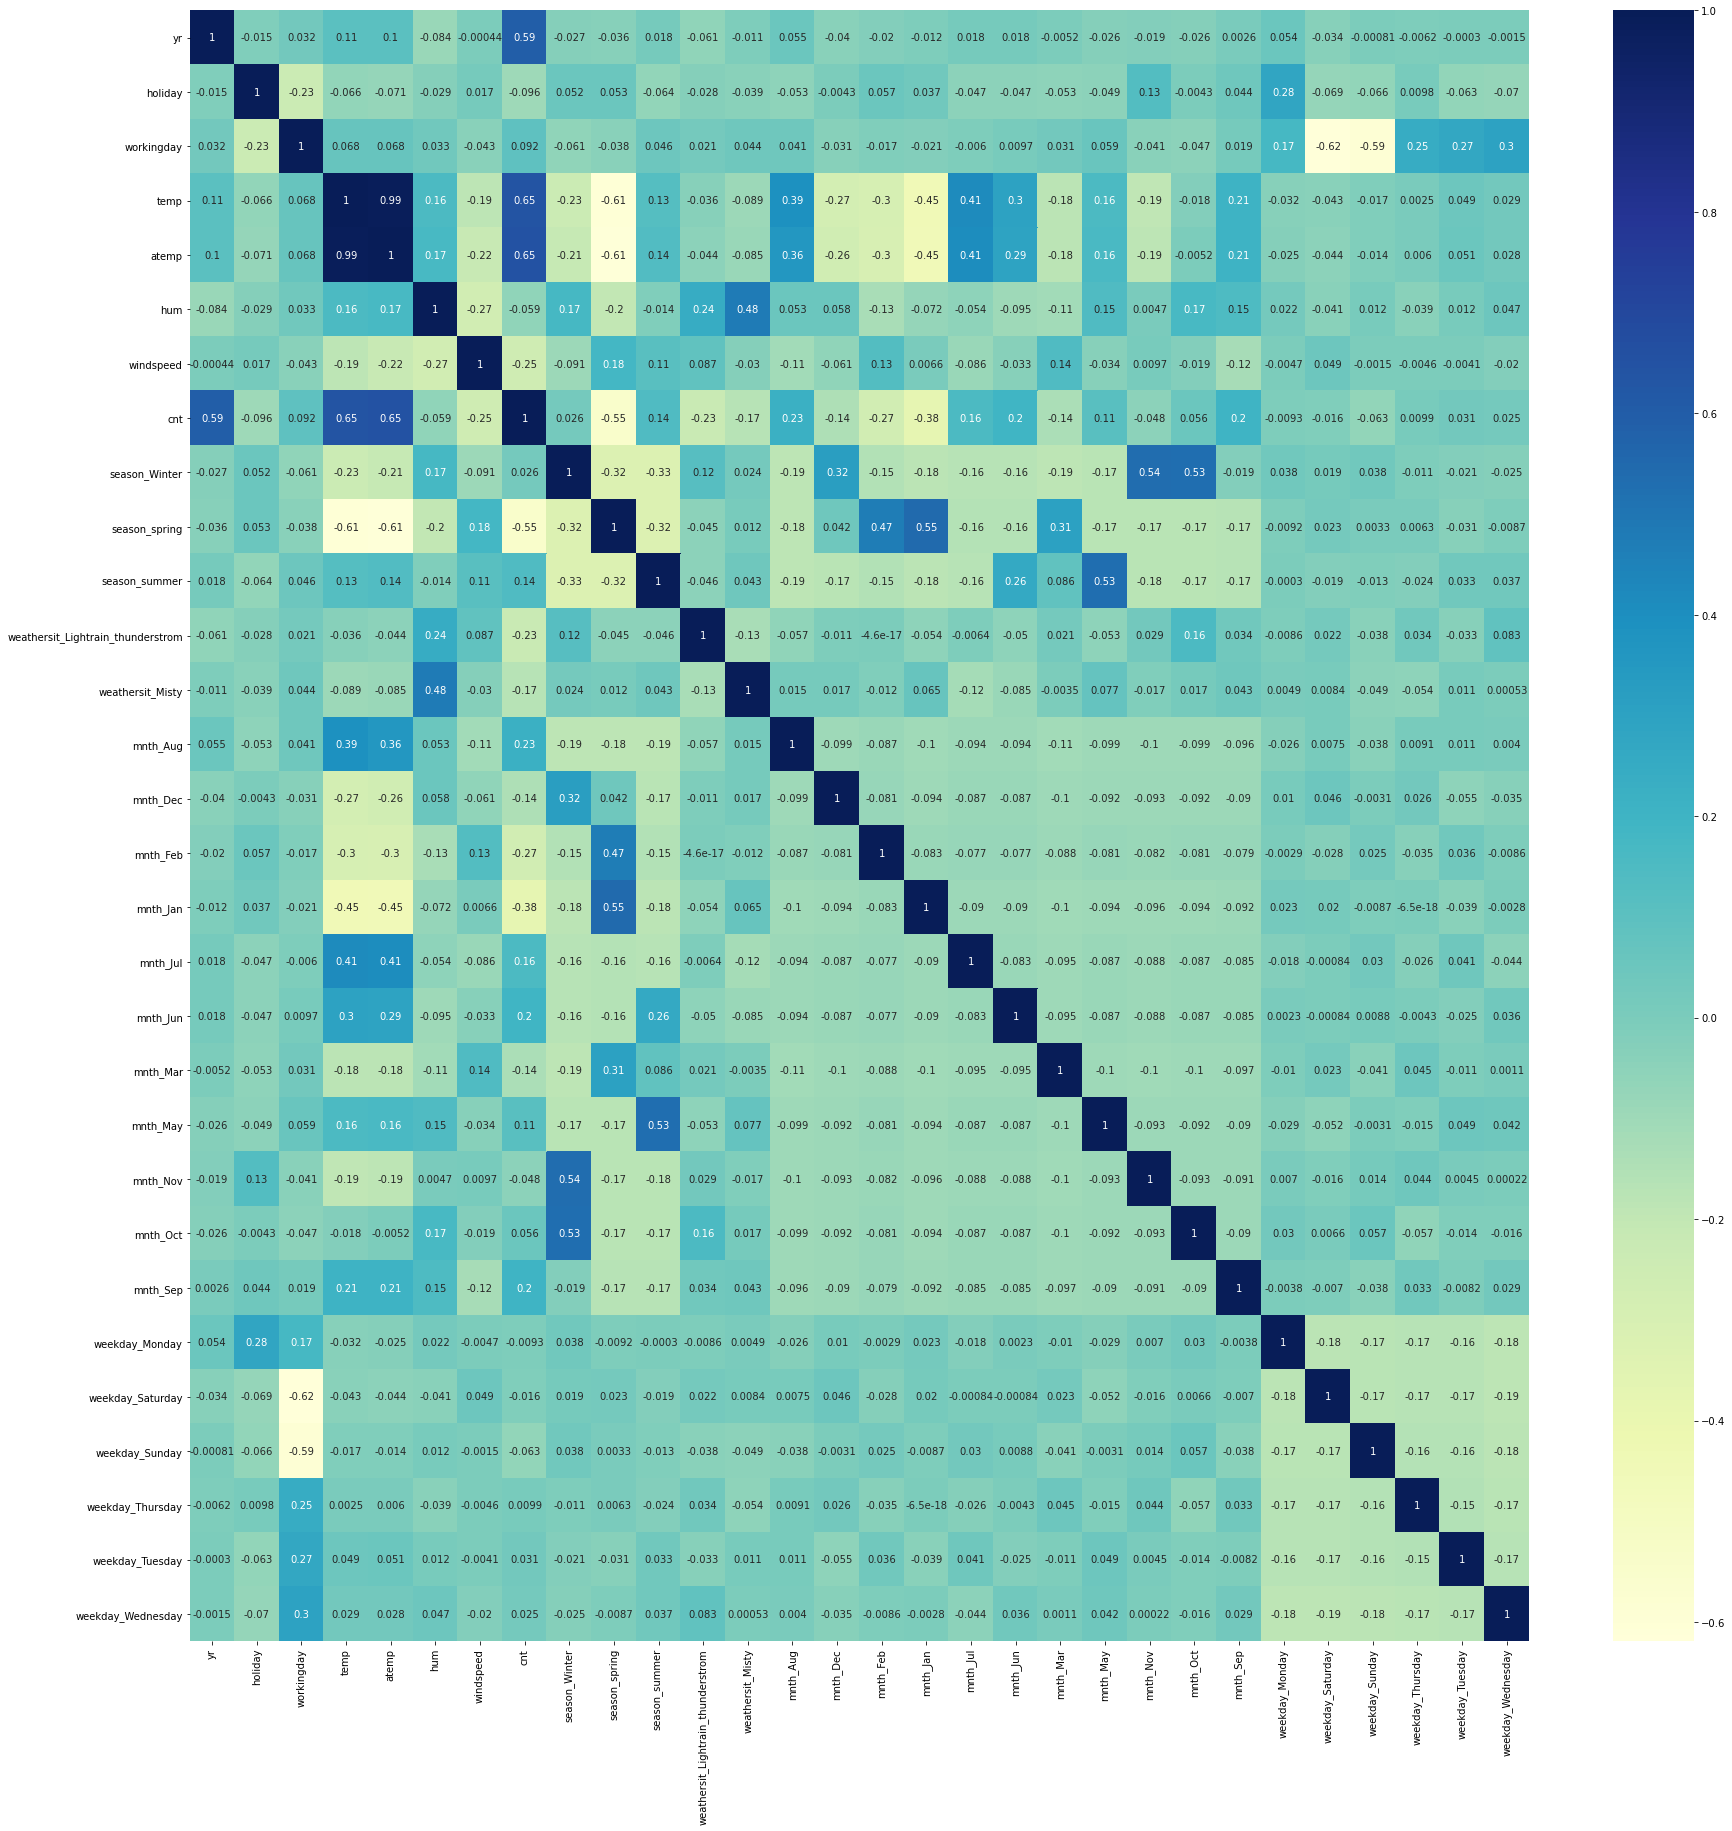

In [42]:
# checking the correlation coefficients to check which variable are highly correlated
plt.figure(figsize = (30,30))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Insight:
1. The heatmap shows which variables are multicollinear in nature, and which variable have high collinearity with the target variable. We need to consider these factors when building the model.
2. We should refer this heatmap while building the model so as to check different correlated values along with VIF & p-value, for identifying the optimum/correct variables to select/eliminate from the model building perspective.
3. Misty weather and humidity has correlation
4. Various seasons has correlation with their respective months.
5. yr, temp, atemp has correlation with cnt
6. spring is negatively correlated with temp, atemp & cnt
7. temp and atemp are highly correlated variables among all.(0.99)




### Dividing into X and Y sets for the model building

In [43]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Building our model

We use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE

Recursive feature elimination

In [44]:
# Importing RFE
from sklearn.feature_selection import RFE

# Running RFE with the output numbe rof variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#Running RFE
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Winter', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('weathersit_Lightrain_thunderstrom', True, 1),
 ('weathersit_Misty', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 15)]

In [46]:
# column selected by rfe
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Winter', 'season_spring', 'season_summer',
       'weathersit_Lightrain_thunderstrom', 'weathersit_Misty', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday'],
      dtype='object')

In [47]:
# columns not selected by rfe
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [48]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Function to calculate VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [50]:
# calling the VIF function
checkVIF(X_train_rfe)

,Features,VIF
2,workingday,50.68
13,weekday_Saturday,12.20
14,weekday_Sunday,11.79
7,season_spring,5.02
3,temp,3.62
6,season_Winter,3.49
1,holiday,2.91
8,season_summer,2.62
4,hum,1.91
10,weathersit_Misty,1.57


In [51]:
import statsmodels.api as sm
# Adding a constant variable
X_train_lm1 =sm.add_constant(X_train_rfe)
# Running the linear model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
#Printing a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.11e-191
Time:                        01:23:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- As workingday	 variable has the highest VIF we will remove this variable

#### Model 2

In [52]:
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)
#  calculating VIF for the new model
checkVIF(X_train_new)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
6,season_spring,4.03
5,season_Winter,3.36
7,season_summer,2.79
9,weathersit_Misty,2.30
0,yr,2.08
10,mnth_Jul,1.59
11,mnth_Sep,1.39


In [53]:
# Building the 2nd model
X_train_lm2 =sm.add_constant(X_train_new )
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.11e-191
Time:                        01:23:47   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- As hum variable has the highest VIF we will remove this variable

#### Model 3

In [54]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
#calculating VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
6,season_summer,2.24
5,season_spring,2.13
0,yr,2.07
4,season_Winter,1.84
9,mnth_Jul,1.59
8,weathersit_Misty,1.56
10,mnth_Sep,1.34
11,weekday_Saturday,1.23


In [55]:
# Building the 3rd model
X_train_lm3 =sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.28e-188
Time:                        01:23:47   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

-Temp has highest VIF but we will not drop it because it is an important variable for the bike rental business. So rather we will drop weekend_Saturday which has high p value.

#### Model 4

In [56]:
X_train_new = X_train_new.drop(['weekday_Saturday'], axis = 1)
#calculating VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
6,season_summer,2.24
5,season_spring,2.11
0,yr,2.07
4,season_Winter,1.81
9,mnth_Jul,1.59
8,weathersit_Misty,1.56
10,mnth_Sep,1.34
11,weekday_Sunday,1.18


In [57]:
# Building the 4th model
X_train_lm4 =sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.45e-189
Time:                        01:23:47   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- Dropping windspeed as it has high VIF. Keeping temp.

#### Model 5

In [58]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)
#  calculating VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,4.27
0,yr,2.06
5,season_summer,1.95
3,season_Winter,1.61
8,mnth_Jul,1.59
7,weathersit_Misty,1.56
4,season_spring,1.43
9,mnth_Sep,1.34
10,weekday_Sunday,1.18
6,weathersit_Lightrain_thunderstrom,1.07


In [59]:
#Building the 5th model
X_train_lm5 =sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.83e-183
Time:                        01:23:47   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- Dropping season summer on the basis of p value

#### Model 6

In [60]:
X_train_new = X_train_new.drop(['season_summer'], axis = 1)
#  calculating VIF for the new model
checkVIF(X_train_new)

,Features,VIF
2,temp,3.08
0,yr,2.05
6,weathersit_Misty,1.51
3,season_Winter,1.35
7,mnth_Jul,1.33
4,season_spring,1.27
8,mnth_Sep,1.19
9,weekday_Sunday,1.17
5,weathersit_Lightrain_thunderstrom,1.07
1,holiday,1.05


In [61]:
# Building the 6th Model
X_train_lm6 =sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.45e-183
Time:                        01:23:47   Log-Likelihood:                 486.88
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     499   BIC:                            -905.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Now as we can see, the VIFs and p-values both are within an acceptable range.VIF less than 5 ( low multicollinearity) and p values are 0 (significant). So we go ahead and make our predictions using this model only.

### Final Model 

#### Model lr6 coefficients

In [62]:
lr6.params

const                                0.203015
yr                                   0.233100
holiday                             -0.108246
temp                                 0.468240
season_Winter                        0.055621
season_spring                       -0.111540
weathersit_Lightrain_thunderstrom   -0.304531
weathersit_Misty                    -0.080127
mnth_Jul                            -0.066663
mnth_Sep                             0.064120
weekday_Sunday                      -0.047896
dtype: float64

#### Equation of best fitted line on the basis of the final model

$ cnt= 0.203015+(0.233100*yr)-(0.108246*holiday)+(0.468240*temp)-(0.111540*season_spring)+(0.055621*season_Winter )-(0.304531*weathersit_Lightrain_thunderstrom)-(0.080127*weathersit_Misty)-(0.066663*mnth_Jul)+(mnth_Sep*0.064120)-(0.047896*weekday_Sunday) $

### Checking Assumptions

#### Error terms are normally distributed with mean zero (not X, Y)


Residual Analysis of train data

In [63]:
y_train_cnt = lr6.predict(X_train_lm6)

In [64]:
residual= y_train - y_train_cnt

Text(0.5, 0, 'Errors')

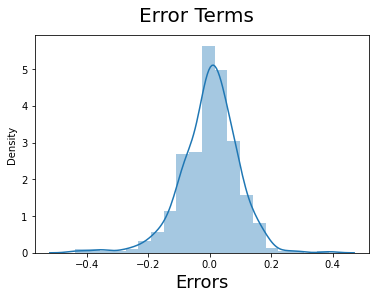

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)      

- We can conclude from above histogram that error terms are normally distributed.

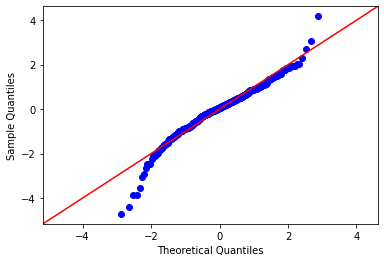

In [66]:
# QQplot
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

 #### linear relationship between X and Y

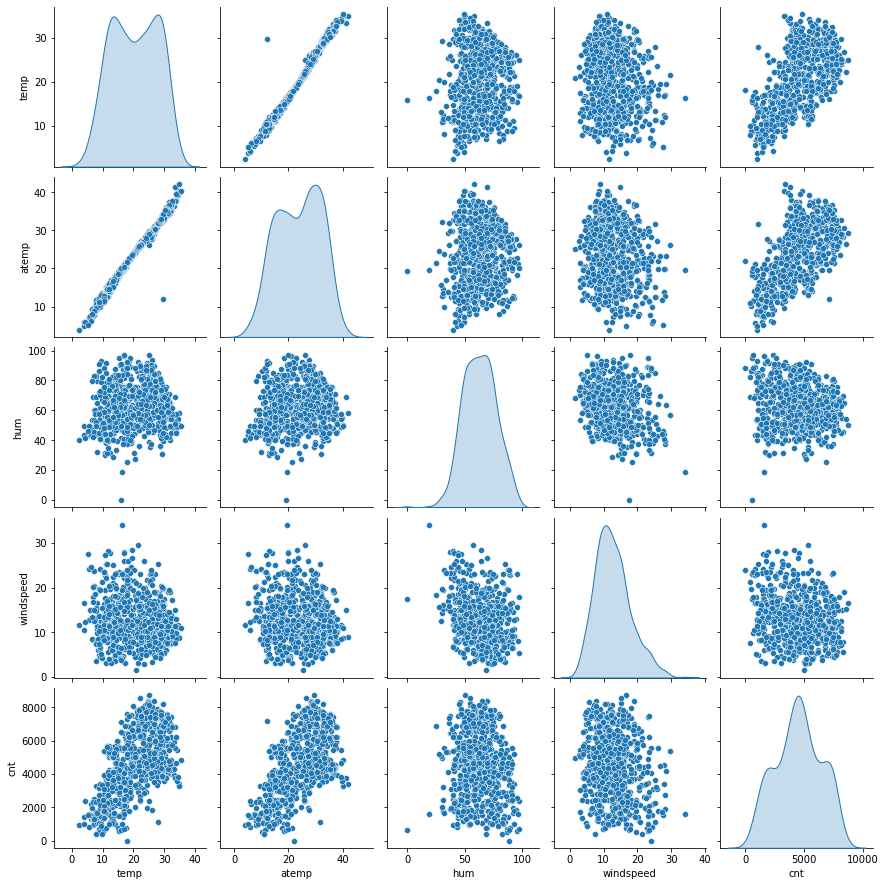

In [67]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_new, diag_kind='kde')
plt.show()

-Seeing this pair plot, we can say that there is a linear relation between temp and atemp variable with the predictor variable‘cnt’.

#### No Multicollinearity between the predictor variables

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.08
0,yr,2.05
6,weathersit_Misty,1.51
3,season_Winter,1.35
7,mnth_Jul,1.33
4,season_spring,1.27
8,mnth_Sep,1.19
9,weekday_Sunday,1.17
5,weathersit_Lightrain_thunderstrom,1.07
1,holiday,1.05


- From the VIF calculation we can say that there is no multicollinearity between the predictor variables, as all the values are within the allowed range of <5.

#### Homoscedasticity

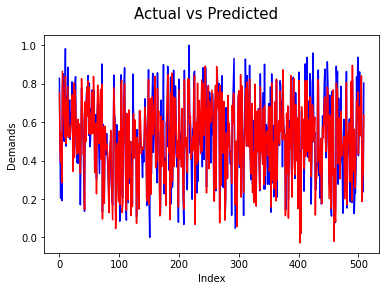

In [69]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_cnt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

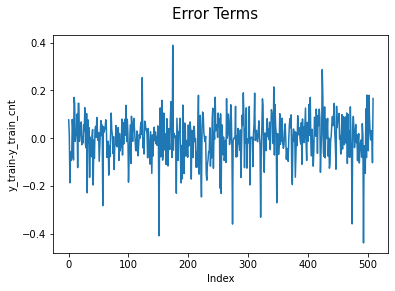

In [70]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_cnt)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_cnt')
plt.show()

- Actual and Predicted result following almost the same pattern so this model seems ok. Also we see the error terms are independent of each other

### Final Model Prediction

#### Apply the scaling on the test sets

In [71]:
num_vars = ['temp','atemp','hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Winter,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


#### DIviding into X_test and y_test

In [72]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm6 = sm.add_constant(X_test_new)

In [74]:
# Making predictions
y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

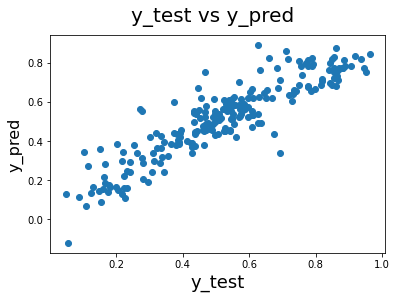

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Evaluation of Model

#### R2 value calculation for bike_test dataframe

In [76]:
from sklearn.metrics import r2_score

r2 = round(r2_score(y_test, y_pred),4)
r2

0.8121

#### Adjusted R2 value calculation for bike_test dataframe

In [77]:
n = X_test.shape[0] # number of rows in test dataset

p = X_test.shape[1]  # Number of features (predictors, p) is the shape along axis 1

# Calculating Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7834

#### R2 Values
- Train data : 0.827  
- Test data: 0.8121


#### Adjusted R2 Values
- Train data : 0.824  
- Test data: 0.7834

- R2 value for test data is 0.8121 which is almost same as R2 value of train data which is 0.827. As R square values varies from 0 to 1 with 1 being the best, our value is a very good R2 value, hence we can say that our model is performing good on test data also which is all we want.

### Final Conclusions & Recommendations

- We have came to following conclusions according to our final model:
1. Tempearture (Temp), weathersit_Lightrain_thunderstrom (Season 3), year (yr) are top 3 predictor of the dependent variable cnt. These variables influences the bike rentals the most.
2. Temperature with coeficient  0.468240 indicates that temperature has positive effect on bike rental.
3. weathersit_Lightrain_thunderstrom with coefficient -0.304531 indicates that the light snow and rain has negative impact on  people from renting out the bikes
4. Year with coefficient 0.233100 indicates that bike rental will go up/increase in the subsequent year.

- We can conclude that company should give weightage to these three variables while planning to achieve maximum bike rental bookings.
- High temperature & pleasant weather are ideal for bike booking so it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.
- Company should focus on increasing the bike counts and servicing them when the weather is not pleasant so as to be prepared for the boom season.
- Also bike bookings are maximum in September month so company should keep this in mind to further increase the bike rentals and should focus more on their stratergy for this month.
- When the situation improves after the pandemic the bike rentals will go up as the trend is incresing in the subsequent years.
